Importing Libraries

In [1]:
import pandas as pd
import numpy as np

Data Sources

In [2]:
cases = 'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

deaths = 'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'


Data Import

In [3]:

cases = pd.read_html(cases)

deaths = pd.read_html(deaths)


Data Cleaning 

In [4]:
cases = cases[0]
deaths = deaths[0]




cases = cases.drop(columns = ['Unnamed: 0', 'Province/State', 'Lat', 'Long'])
deaths = deaths.drop(columns = ['Unnamed: 0', 'Province/State', 'Lat', 'Long'])




cases = cases.transpose()
deaths = deaths.transpose()




cases_header = cases.iloc[0]
cases = cases[1:]
cases.columns = cases_header
cases = cases.reset_index()




deaths_header = deaths.iloc[0]
deaths = deaths[1:]
deaths.columns = deaths_header
deaths = deaths.reset_index()




cases['Date'] = pd.to_datetime(cases['index'])
deaths['Date'] = pd.to_datetime(deaths['index'])




cases = cases.set_index(cases['Date'])
deaths = deaths.set_index(deaths['Date'])



# Graphical Analysis

- Focusing, first on the confirmed Cases and reported Deaths for South Africa.
- We need to starndadise the Cases and Death variables for SA, Standardisation allows us to plots variables with different scales on the same plot. This makes it easy to analyse the distribution of different variables. 
- To standardise a variable you subtract the mean and divide by the standard deviation. 
- The data is aslo cumulative so we need to apply the .diff() in pandas to get the daily values first. 


Getting the daily values

In [5]:
cases['SA'] = cases['South Africa'].diff().astype(float)
deaths['SA'] = deaths['South Africa'].diff().astype(float)

Unstandandardised distributions

Cases

In [6]:
cases['SA'].plot(figsize = (15, 8), grid = True)

Deaths

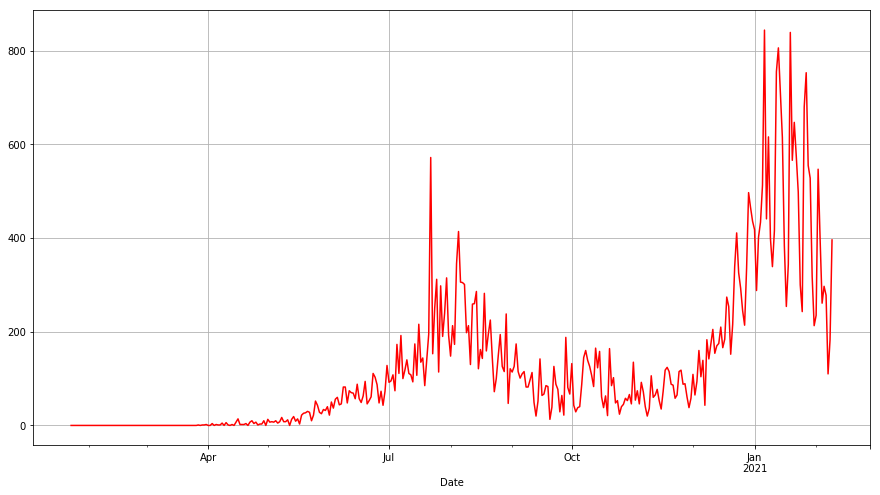

In [7]:
deaths['SA'].plot(figsize = (15, 8), grid = True, color = 'red')

Standardising the variables

In [8]:
mean_cases = np.mean(cases['SA'])
std_cases = np.std(cases['SA'])
cases['Cases'] = ((cases['SA'] - mean_cases) / std_cases).astype(float)



mean_deaths = np.mean(deaths['SA'])
std_deaths = np.mean(deaths['SA'])
deaths['Deaths'] = ((deaths['SA'] - mean_deaths) / std_deaths).astype(float)


Standardised Distributions

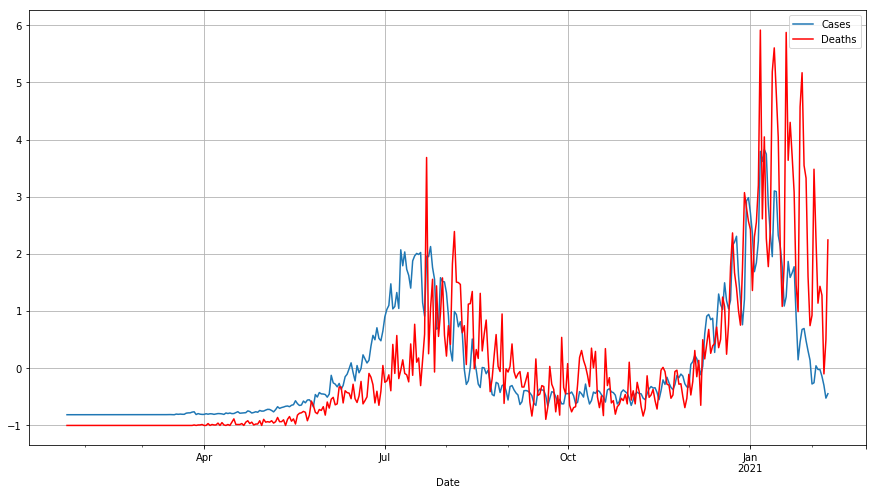

In [9]:
cases['Cases'].plot(figsize = (15, 8), grid = True, legend = True)
deaths['Deaths'].plot(figsize = (15, 8), grid = True, color = 'red', 
                      legend = True)

Let us smooth the variablbles by taking the weekly average

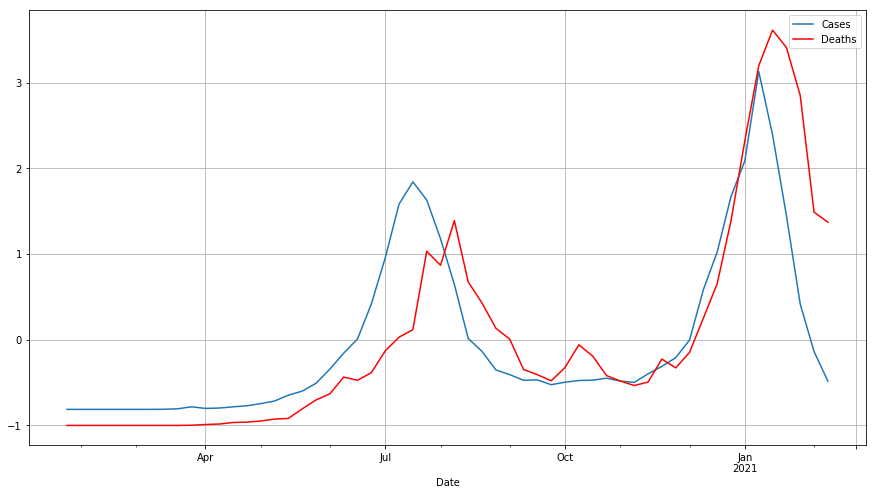

In [10]:
cases['Cases'].resample('W').mean().plot(figsize = (15, 8), 
                                         grid = True, legend = True)
deaths['Deaths'].resample('W').mean().plot(figsize = (15, 8), 
                                           grid = True, color = 'red', 
                                           legend = True)

The deaths do mirror the cases - South Africa is nearing the end of a second wave